**Лабораторная работа №1 “Линейная регрессия”**

Долматович Алина, 858641

Набор данных ex1data1.txt представляет собой текстовый файл, содержащий информацию о населении городов (первое число в строке) и прибыли ресторана, достигнутой в этом городе (второе число в строке). Отрицательное значение прибыли означает, что в данном городе ресторан терпит убытки.

Набор данных ex1data2.txt представляет собой текстовый файл, содержащий информацию о площади дома в квадратных футах (первое число в строке), количестве комнат в доме (второе число в строке) и стоимости дома (третье число).

In [1]:
import pandas
import matplotlib.pyplot as mp
import numpy as np
import mpl_toolkits.mplot3d
from matplotlib import cm
import time

Загрузите набор данных ex1data1.txt из текстового файла.

In [2]:
def getData(fileName):
    return pandas.read_csv(fileName, sep = ",", header=None)

data = getData('ex1data1.txt').sort_values(by=0)
# print(data)

Постройте график зависимости прибыли ресторана от населения города, в котором он расположен.

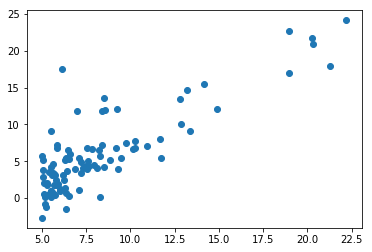

In [3]:
population = list(data[0])
profit = list(data[1])

def defaultPlot():
    mp.scatter(population, profit)

# mp.plot([4, 25], [0, 27], 'r') # y = 1,286x - 5,143
defaultPlot()
mp.show()

Реализуйте функцию потерь J(θ) для набора данных ex1data1.txt.

In [4]:
def MSECostFunction(y, theta):
    def predictedValue(x):
        return theta[0]*x + theta[1]
    
    def lossValue(existent, predicted):
        return (existent - predicted)

    hypothesis = map(predictedValue, y)
    lossValue = map(lossValue, y, hypothesis)
    costValue = sum(map(lambda x: x ** 2, lossValue)) / (2*len(y))
    return hypothesis, lossValue, costValue

theta = [0.89710913,  0.89710913]
_, _, cost = MSECostFunction(population, theta)
print(cost)

0.0801101386171


Реализуйте функцию градиентного спуска для выбора параметров модели. 
Постройте полученную модель (функцию) совместно с графиком из пункта 2.

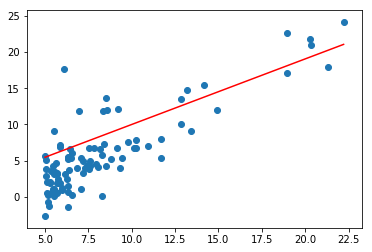

In [5]:
theta1 = []
theta2 = []

def gradientDescent(xValue, yValue, theta=[0, 0], alpha=0.001):
    theta = np.array(theta)
    xValue = np.array(xValue)
    yValue = np.array(yValue)
    
    optimalTheta, optimalCost = theta, 10000000
    
    for i in range(100):
        hypothesis, lossValue, costValue = MSECostFunction(xValue, theta)
        theta1.append(theta[0])
        theta2.append(theta[1])
        
        gradient = np.dot(xValue, lossValue) / len(xValue)
        if optimalCost > costValue:
            optimalTheta, optimalCost = theta, costValue
        theta = theta + alpha * gradient
        
    return optimalTheta, optimalCost
        
    
theta, cost = gradientDescent(population, profit)

hypothesis, _, _ = MSECostFunction(population, theta)
mp.plot(population, hypothesis, 'r')
defaultPlot()
mp.show()

Постройте трехмерный график зависимости функции потерь от параметров модели (θ0 и θ1) как в виде поверхности, так и в виде изолиний (contour plot).

In [6]:
def getPlotData(theta1, theta2):
    X = np.array(theta1)
    Y = np.array(theta2)
    X, Y = np.meshgrid(X, Y)
    Z = np.zeros((len(X), len(Y)))

    for rowIndex in range(len(X)):
        for columnIndex in range(len(X[rowIndex])):
            theta1 = X[rowIndex][columnIndex]
            theta2 = Y[rowIndex][columnIndex]
            _, _, cost = MSECostFunction(population, [theta1, theta2])
            Z[rowIndex][columnIndex] = cost
    
    return X, Y, Z

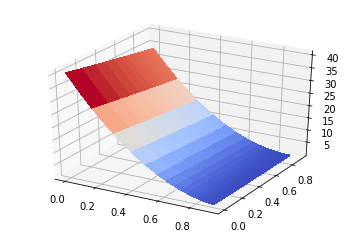

In [7]:
figure = mp.figure()
ax = figure.gca(projection='3d')
startTimeNonVectorized = time.time()
X, Y, Z = getPlotData(theta1, theta2)
finishTimeNonVectorized = time.time()
surface = ax.plot_surface(X.copy(), Y.copy(), Z.copy(), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
mp.show()

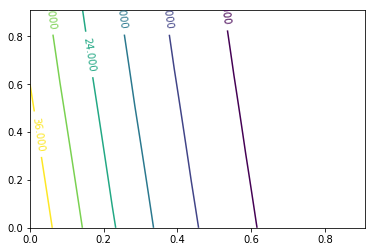

In [8]:
fig, ax = mp.subplots()
CS = ax.contour(X.copy(), Y.copy(), Z.copy())
ax.clabel(CS, inline=1, fontsize=10)

mp.show()

Загрузите набор данных ex1data2.txt из текстового файла.

In [9]:
data2 = getData('ex1data2.txt')
# print(data2)

Произведите нормализацию признаков. Повлияло ли это на скорость сходимости градиентного спуска? Ответ дайте в виде графика.

In [10]:
#Xnorm = (X - Xmin) / (Xmax - Xmin)

sqareList = list(data2[0])
roomList = list(data2[1])
priceList = list(data2[2])

def normalize(list):
    normalizeList = []
    xMax, xMin = max(list), min(list)
    for item in list:
        normalizeValue = float(item - xMin)/float(xMax - xMin)
        normalizeList.append(normalizeValue)
    return normalizeList

normalizedPrice = normalize(priceList)
normalizedRoom = normalize(roomList)
normalizedSquare = normalize(sqareList)

Реализуйте функции потерь J(θ) и градиентного спуска для случая многомерной линейной регрессии с использованием векторизации

In [13]:
def vectorizedCostFunction(X, Y, theta):
    temp = (X.dot(theta) - Y)
    return (1. / (2 * len(X))) * np.dot(temp.T, temp)

def vectorizedGradientDescent(X, Y, theta, iterations=500, alpha=0.0000001):
    optimalTheta, optimalCost = theta, float("inf")
    thetas = [theta]
    costs = []
    for i in range(iterations):
        value = (((X.dot(theta) - Y).T).dot(X)).T
        a = alpha * (1. / len(Y)) * value
        theta -= alpha * (1. / len(Y)) * value
        thetas.append(theta)
        cost = vectorizedCostFunction(X, Y, theta)
        costs.append(cost)
        if cost < optimalCost:
            optimalCost = cost
            optimalTheta = theta
    return np.array(thetas), np.array(costs)

X = np.array(data2.iloc[:, 0:2])
Y = np.array(data2[2])
theta = [165, 2]
# cost = vectorizedCostFunction(X, Y, theta)
# print(cost)
# optimalTheta, optimalCost, optimalThetas = vectorizedGradientDescent(X, Y, theta)
optimalThetas, optimalCosts = vectorizedGradientDescent(X, Y, theta, 500, 0.0000001)

normalizedX = np.column_stack([normalizedSquare, normalizedRoom])
normalizedY = np.array(normalizedPrice)
# normalizedCost = vectorizedCostFunction(normalizedX, normalizedY, theta)
# print(normalizedCost)
# normalizedOptimalTheta, normalizedOptimalCost, normalizedOptimalThetas = vectorizedGradientDescent(normalizedX, normalizedY, theta)
normalizedOptimalThetas, normalizedOptimalCosts = vectorizedGradientDescent(normalizedX, normalizedY, theta)

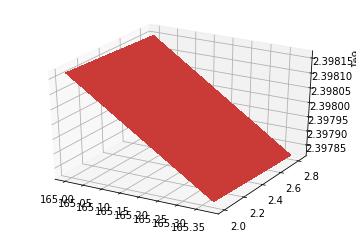

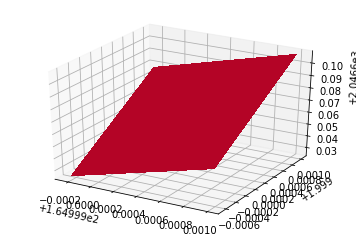

In [14]:
def getPlotData(xArray, yArray, theta):
    X = np.array(theta[:,0])
    Y = np.array(theta[:,1])
    X, Y = np.meshgrid(X, Y)
    Z = np.zeros((len(X), len(Y)))

    for rowIndex in range(len(X)):
        for columnIndex in range(len(X[rowIndex])):
            theta1 = X[rowIndex][columnIndex]
            theta2 = Y[rowIndex][columnIndex]
            cost = vectorizedCostFunction(xArray, yArray, [theta1, theta2])
            Z[rowIndex][columnIndex] = cost
    
    return X, Y, Z

startTimeVectorized = time.time()
X1, Y1, Z1 = getPlotData(X, Y, optimalThetas)
finishTimeVectorized = time.time()
X2, Y2, Z2 = getPlotData(normalizedX, normalizedY, normalizedOptimalThetas)

# Plot the surface.
figure = mp.figure()
ax = figure.gca(projection='3d')
surface = ax.plot_surface(X1.copy(), Y1.copy(), Z1.copy(), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
figure = mp.figure()
ax = figure.gca(projection='3d')
surface = ax.plot_surface(X2.copy(), Y2.copy(), Z2.copy(), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

mp.show()

Покажите, что векторизация дает прирост производительности.

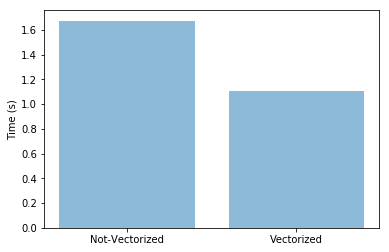

In [15]:
objects = ('Not-Vectorized', 'Vectorized')
y_pos = np.arange(len(objects))
performance = [finishTimeNonVectorized-startTimeNonVectorized, finishTimeVectorized-startTimeVectorized] 
mp.bar(y_pos, performance, align='center', alpha=0.5)
mp.xticks(y_pos, objects)
mp.ylabel('Time (s)')

mp.show()

Попробуйте изменить параметр ɑ (коэффициент обучения). 
Как при этом изменяется график функции потерь в зависимости от числа итераций градиентного спуск? 
Результат изобразите в качестве графика.



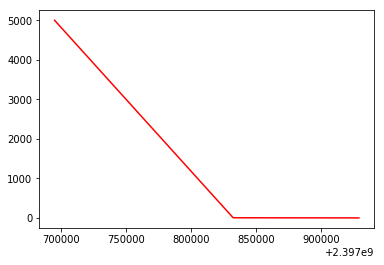

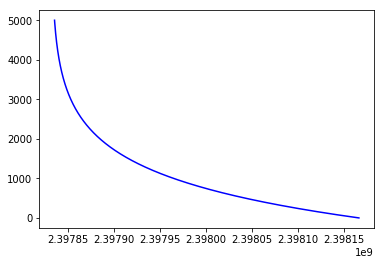

In [18]:
_, optimalCosts1 = vectorizedGradientDescent(X, Y, theta, 5000, 0.0000001)
_, optimalCosts2 = vectorizedGradientDescent(X, Y, theta, 5000, 0.0000000001)

y1 = np.array(range(len(optimalCosts1)))
y2 = np.array(range(len(optimalCosts2)))

mp.plot(optimalCosts1, y1, 'r')
mp.show()
mp.plot(optimalCosts2, y2, 'b')
mp.show()

Постройте модель, используя аналитическое решение, которое может быть получено методом наименьших квадратов. 
Сравните результаты данной модели с моделью, полученной с помощью градиентного спуска.



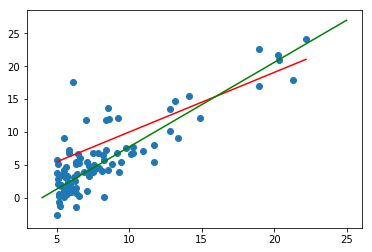

In [19]:
mp.plot(population, hypothesis, 'r')
mp.plot([4, 25], [0, 27], 'g') # y = 1,286x - 5,143
defaultPlot()
mp.show()

**Вывод**

Линейная регрессия — модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости.

Линейная регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных и стала простым предшественником нелинейных методов, которые используют для обучения нейронных сетей.

Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует этим точкам. 